<a href="https://colab.research.google.com/github/LuizFelipe33/Cluster/blob/main/Atividade_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de dados de países
Utilizamos uma base de dados do Kaggle de países. A categoria do país é definida pelos seguintes critérios:



* **child_mort** - Mortalidade infantil.
* **exports** - Número de exportações.
* **health** - Número de investimento na área da saúde.
* **imports** - Número de importações.
* **income** - Receita líquida.
* **inlation** - Inflação do país.
* **life_expec** - Expectativa de vida.
* **total_fer** - Fertilidade absoluta.
* **gdpp** - Produto Interno Bruto (PIB).



In [63]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as plotly
import plotly.graph_objects as plotlygraph
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from sklearn import metrics

In [65]:
countrydata = pd.read_csv('Country-data.csv')
df = pd.DataFrame(countrydata)

In [66]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [67]:
for i in df.columns:
  nulos = df[i].isnull().sum()
  print(i, nulos)

country 0
child_mort 0
exports 0
health 0
imports 0
income 0
inflation 0
life_expec 0
total_fer 0
gdpp 0


In [68]:
df = df.drop(columns=['country'])

#Separação dos países 

In [69]:
def countryclass (df2):
  recebe = []
  count = 0
  acoluna = 0
  soma = 0
  for g in df2:
    acoluna = g
    acoluna[0] = -acoluna[0]
    acoluna[5] = -acoluna[5]
    for b in acoluna:
      soma = soma + b
    recebe.append(soma/9)
    count = count + 1
    soma = 0
    print(len(recebe))
  return recebe

In [70]:
desenv = countryclass(df.values.tolist())
print(max(desenv))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
21900.142222222225


In [71]:
desenv1 = pd.DataFrame(desenv)
desenv1.describe()

,0
count,167.000000
mean,3359.012328
std,4073.000946
min,107.650000
25%,583.848333
50%,1676.790000
75%,4064.131111
max,21900.142222


In [72]:
def avaliar (pais):
  countmdes = 0
  countdes = 0
  countemg = 0
  countsubdes = 0
  for m in pais:
    if m > 10600:
      countmdes = countmdes + 1
    if m > 6000 and m <= 10600:
      countdes = countdes + 1
    if m > 2500 and m <= 6000:
      countemg = countemg + 1
    if m <= 2500:
      countsubdes = countsubdes + 1
  print('muito desenvolvidos:')
  print(countmdes)
  print('desenvolvidos:')
  print(countdes)
  print('emergentes:')
  print(countemg)
  print('sub desenvolvidos:')
  print(countsubdes)

In [73]:
avaliar(desenv)

muito desenvolvidos:
10
desenvolvidos:
22
emergentes:
34
sub desenvolvidos:
101


#Standard Scaler

In [74]:
def transformar (data):
  sc = StandardScaler()
  data1 = sc.fit_transform(data)
  return data1

In [75]:
df1 = transformar(df)
df1

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#KMeans

In [76]:
cluster = []
for c in range(1, 11):
  kmeans_model = KMeans(n_clusters = c, random_state = 0)
  kmeans_model.fit(df1)
  cluster.append(kmeans_model.inertia_)

In [77]:
cluster

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3917199643633,
 631.3877859960571,
 551.4868669336881,
 498.5882374565912,
 465.86138131175244,
 423.4791757975066,
 405.4614215503941]

In [78]:
cotovelo = plotly.line(x = range(1, 11), y = cluster)
cotovelo.show()

##Gráficos de silhueta

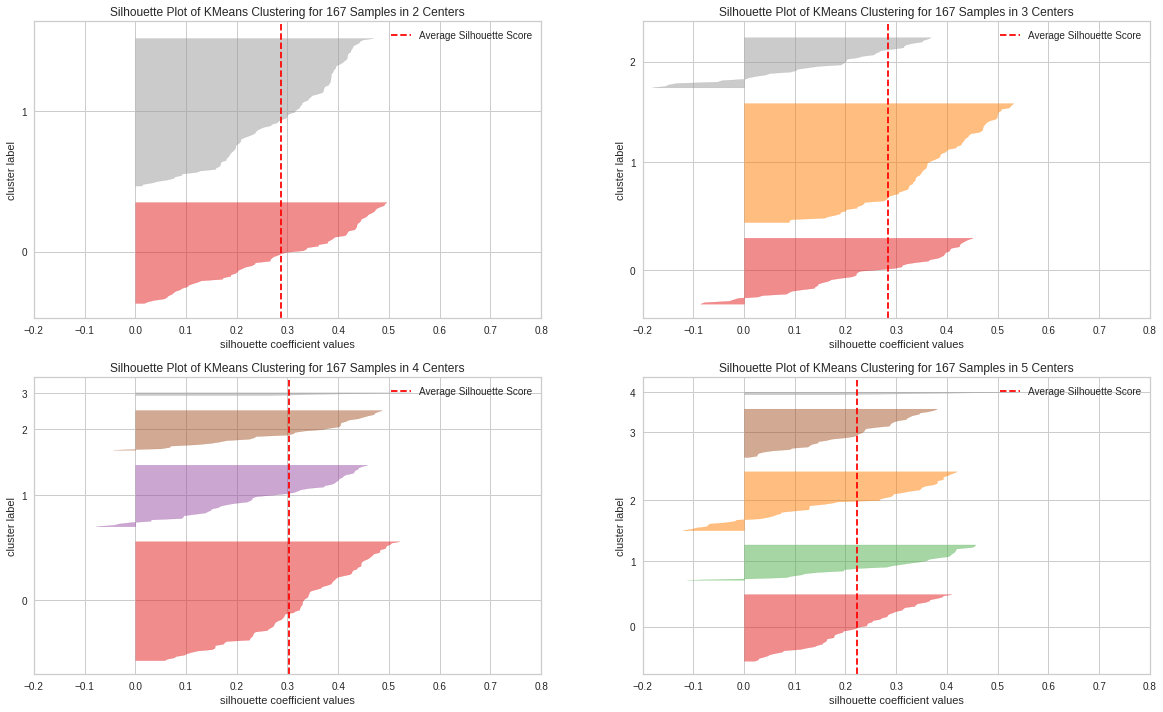

In [79]:
figura, axes = plt.subplots( 2, 2, figsize=(20, 12))
axes = axes.reshape(4)

for g, k in enumerate(range(2, 6)):
  ax = axes[g]
  silhueta = SilhouetteVisualizer(
      KMeans (n_clusters=k, random_state=0),
      ax = ax,
  )
  silhueta .fit(df1)
  silhueta .finalize()
  ax.set_xlim(-0.2, 0.8)


In [80]:
kmeans_model = KMeans(n_clusters = 5, random_state = 0)
clusters = kmeans_model.fit_predict(df1)

In [81]:
j = metrics.silhouette_score(df1, clusters, metric='euclidean')
print(j)

0.22327899566511256


In [82]:
clusters

array([2, 0, 3, 2, 0, 3, 3, 1, 1, 3, 0, 0, 3, 0, 0, 1, 0, 2, 0, 3, 0, 2,
       3, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 3, 3, 3, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 3, 2, 2, 0,
       2, 0, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 0, 3, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 3, 0, 4, 0, 2, 2, 0, 0, 2, 4, 2, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3,
       1, 1, 2, 2, 1, 3, 2, 0, 0, 3, 3, 0, 1, 1, 3, 3, 2, 0, 3, 2, 0, 0,
       2, 4, 0, 0, 0, 2, 0, 1, 3, 0, 2, 0, 1, 1, 3, 2, 0, 2, 2, 3, 0, 3,
       0, 2, 0, 1, 1, 1, 3, 3, 0, 3, 0, 2, 2], dtype=int32)

##PCA
Evitar outliers

In [83]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df1)

In [84]:
df_pca.shape

(167, 2)

In [85]:
df_pca

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

In [86]:
grafico1 = plotly.scatter(x = df_pca[:,0], y = df_pca[:,1], color = clusters)
grafico1.show()

In [87]:
df_pca

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

#DBSCAN

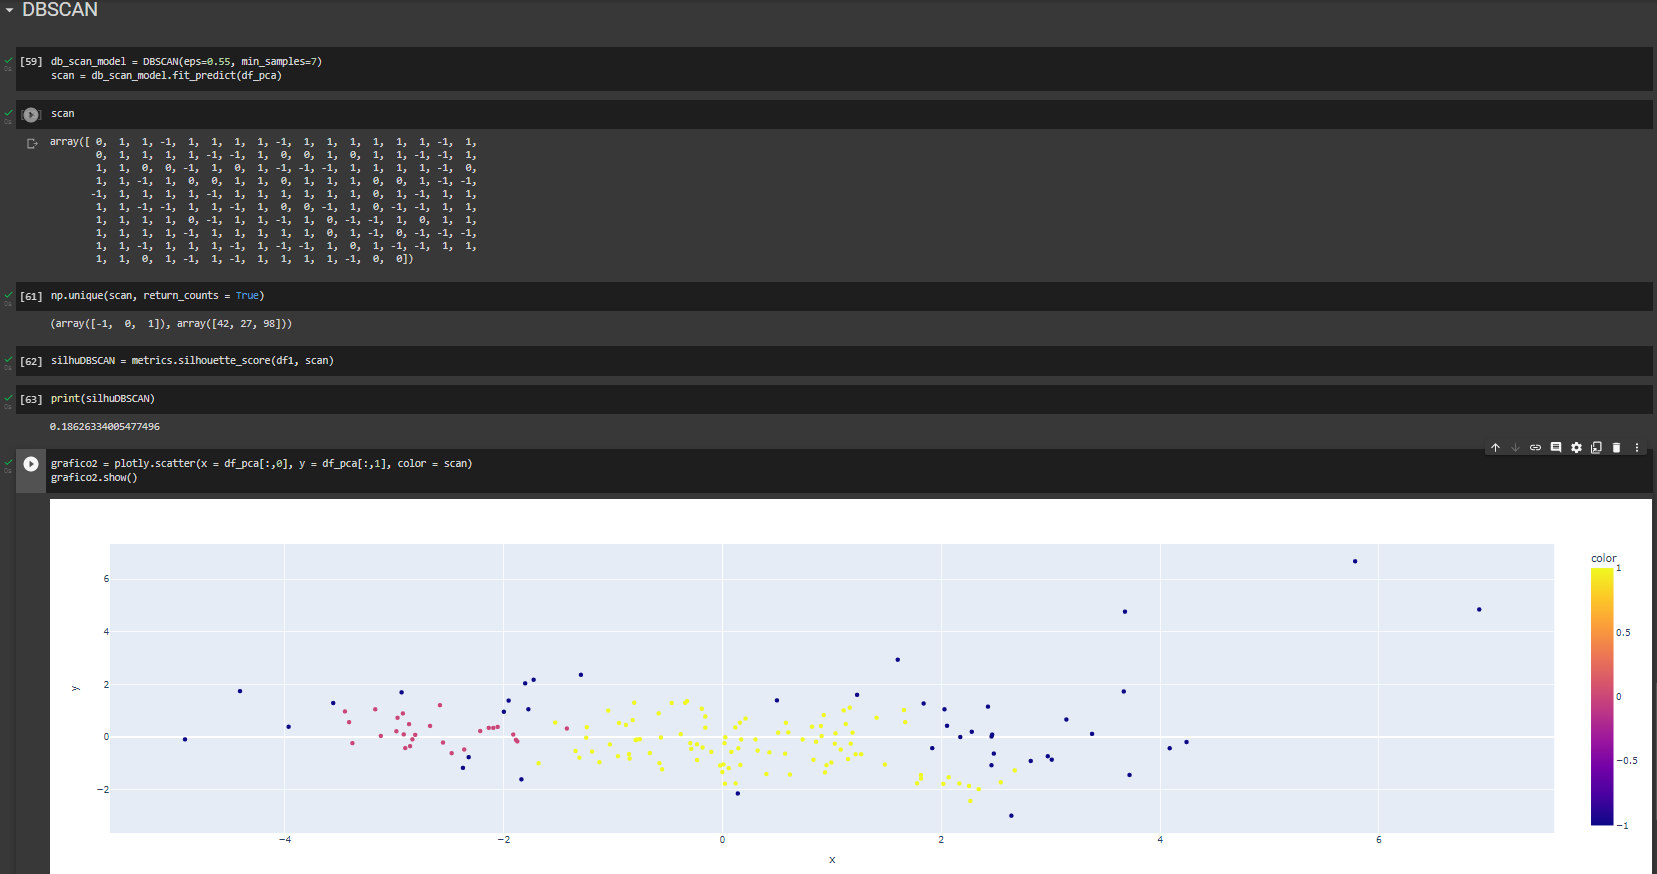

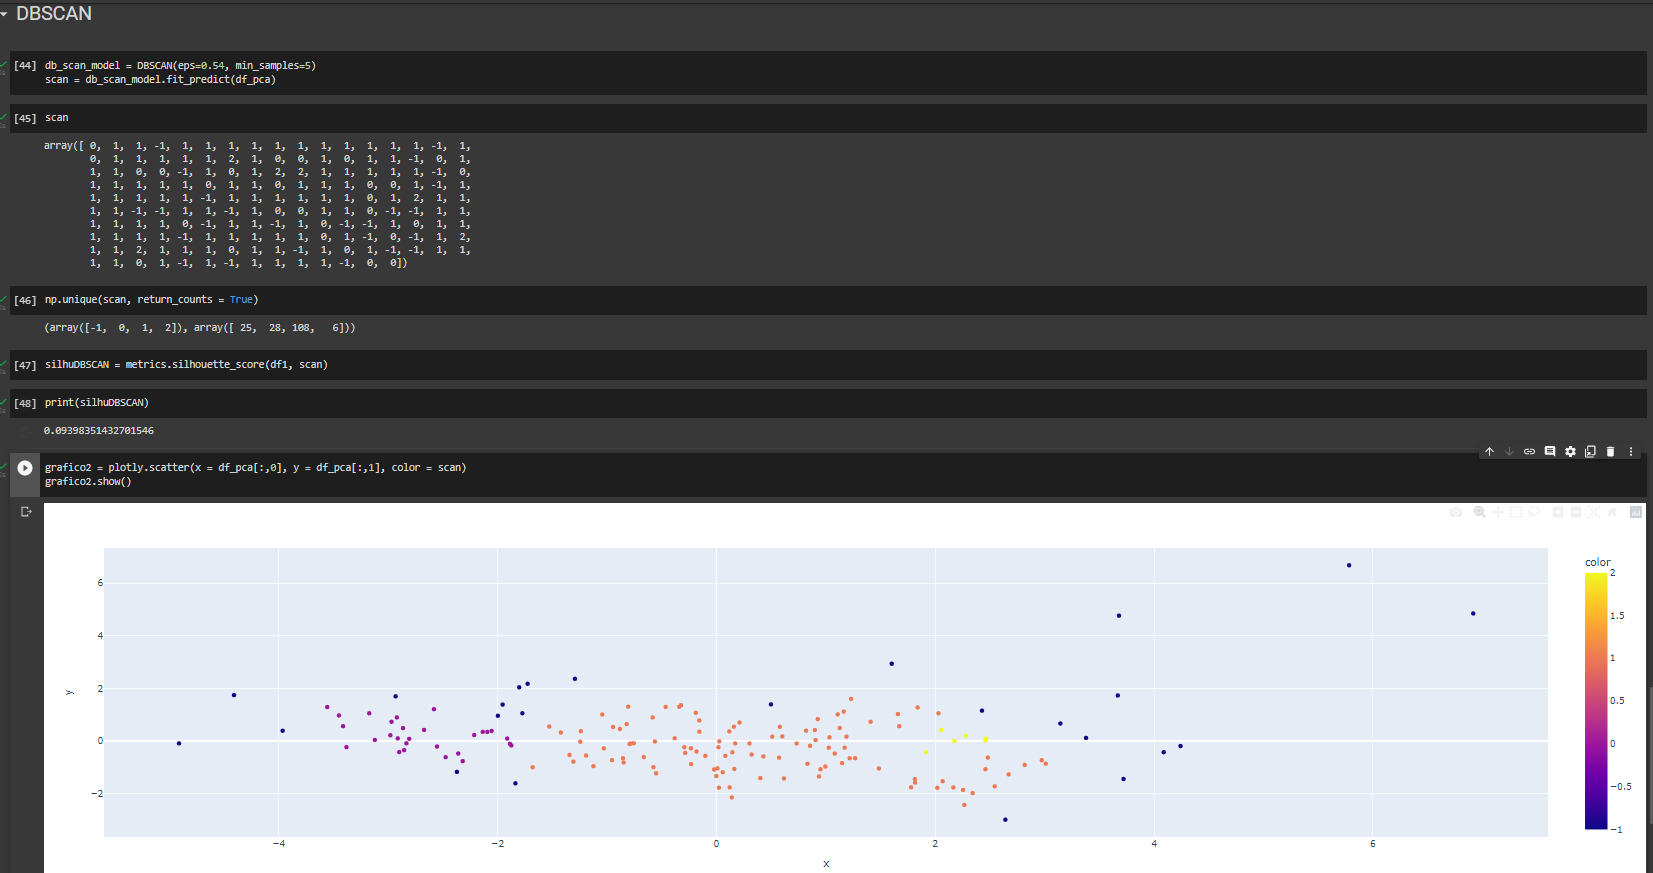

In [88]:
db_scan_model = DBSCAN(eps=0.53, min_samples=7)
scan = db_scan_model.fit_predict(df_pca)

In [89]:
scan

array([ 0,  1,  1, -1,  1,  1,  1,  2, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        0,  1,  1,  1,  1, -1, -1,  1,  0,  0,  1,  0,  2,  1, -1, -1,  1,
        1,  1,  0,  0, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  0,
        1,  1, -1,  2,  1,  0,  1,  2,  0,  2,  1,  1,  0,  0, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  2,  1,  2,  1,  1,  0,  1, -1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  0,  0, -1,  1,  0, -1, -1,  1,  1,
        1,  1,  1,  1,  0, -1,  1,  1, -1,  2, -1, -1, -1,  1,  0,  1,  1,
        1,  1,  1,  2, -1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1, -1, -1,
        1,  1, -1,  2,  1,  1, -1,  1, -1, -1,  1,  0,  1, -1, -1,  1,  1,
        1,  1,  0,  1, -1,  2, -1,  1,  1,  1,  1, -1,  0,  0])

In [90]:
np.unique(scan, return_counts = True)

(array([-1,  0,  1,  2]), array([45, 24, 87, 11]))

In [91]:
silhuDBSCAN = metrics.silhouette_score(df1, scan)

In [92]:
print(silhuDBSCAN)

0.10909377901101146


In [94]:
grafico2 = plotly.scatter(x = df_pca[:,0], y = df_pca[:,1], color = scan)
grafico2.show()